In [11]:
import dicom # for reading dicom files
from pydicom.data import get_testdata_files
import os # for doing directory operations 
import pandas as pd # for some simple data analysis (right now, just to load in the labels data and quickly reference it)

# Change this to wherever you are storing your data:
# IF YOU ARE FOLLOWING ON KAGGLE, YOU CAN ONLY PLAY WITH THE SAMPLE DATA, WHICH IS MUCH SMALLER
data_dir = './az/'
patients = os.listdir(data_dir)
# labels_df = pd.read_csv('stage1_labels.csv', index_col=0)

import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
for img in patients:
    slices = [dicom.read_file(data_dir + '/'+ img)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
print(len(slices), slices[0].pixel_array.shape)

(1, (512, 512))


In [3]:
slices[0]

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.95568.30000017091800574405500002386
(0008, 0020) Study Date                          DA: '20170918'
(0008, 0021) Series Date                         DA: '20170918'
(0008, 0022) Acquisition Date                    DA: '20170918'
(0008, 0023) Content Date                        DA: '20170918'
(0008, 002a) Acquisition DateTime                DT: '20170918094646.577000'
(0008, 0030) Study Time                          TM: '093107.536000'
(0008, 0031) Series Time                         TM: '094713.244000'
(0008, 0032) Acquisition Time                    TM: '094646.577000'
(0008, 0033) Content Time                        TM: '094646.577000'
(0008, 0050) Accession Number                

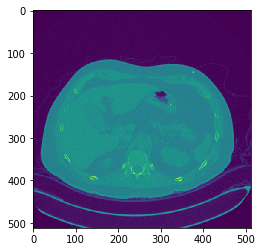

In [8]:
slices = [dicom.read_file(data_dir +'/' + s) for s in os.listdir(data_dir)]
slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
plt.imshow(slices[24].pixel_array)
plt.show()

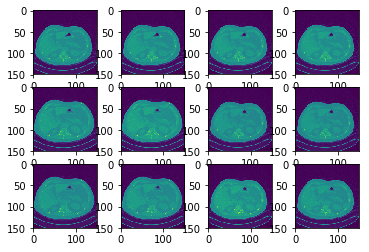

In [12]:
IMG_PIX_SIZE = 150 

fig = plt.figure()
for num, each_slice in enumerate(slices[:12]):
    y = fig.add_subplot(3, 4, num+1)
    new_image = cv2.resize(np.array(each_slice.pixel_array), (IMG_PIX_SIZE, IMG_PIX_SIZE))
    plt.imshow(new_image)
plt.show()
    

In [13]:
print(len(slices), slices[0].pixel_array.shape)

(1102, (512, 512))
